In [1]:
import os
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
#from evaluate.lane import LaneEval
%matplotlib inline

# Setup data location

In [2]:
data_dir = '/home/sang/datasets/tusimple-benchmark/'
meta_file = '../output/metadata/tusimple.json'

resize_image = True
new_w = 512
new_h = 256
thickness = 5

# Loading data and select the first image in the label list to visualize

In [3]:
# select from a split and image id
image_id = '0313-2-42040'
split = 'train'

# image_id = '0601-1494453391651120722'
# split = 'test'

json_mt = json.load(open(meta_file))
gt_img = json_mt[split][image_id]

# Load the raw image. 

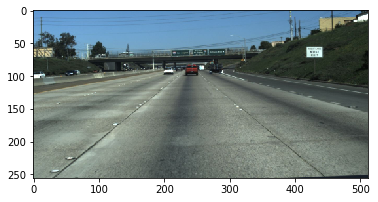

In [4]:
raw_file = os.path.join(data_dir, gt_img['raw_file'])

#img = plt.imread(raw_file)

#this will get the same result with plt.imread
img = cv2.imread(raw_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

w = img.shape[1]
h = img.shape[0]

x_rate = 1.0 * new_w / w
y_rate = 1.0 * new_h / h

if resize_image:
    img = cv2.resize(img, (new_w, new_h))
    
plt.imshow(img)
plt.show()

# Draw the ground-truth points

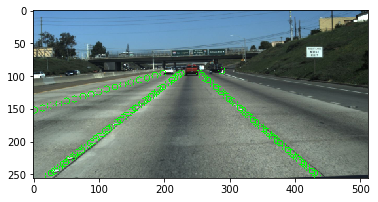

In [5]:
gt_lanes = gt_img['lanes']
y_samples = gt_img['h_samples']

gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]

if resize_image:
    gt_lanes_vis = [[(int(x*x_rate), int(y*y_rate)) for (x, y) in lane] for lane in gt_lanes_vis] 
    
img_vis = img.copy()

for lane in gt_lanes_vis:
    for pt in lane:
        cv2.circle(img_vis, pt, radius=thickness, color=(0, 255, 0))

plt.imshow(img_vis)
plt.show()

# Fit the ground truth points with a lines

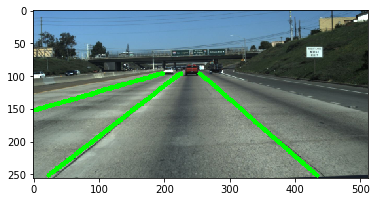

In [6]:
img_vis = img.copy()

for lane in gt_lanes_vis:
    cv2.polylines(img_vis, np.int32([lane]), isClosed=False, color=(0,255,0), thickness=thickness)

plt.imshow(img_vis)
plt.show()

# Generate binary image

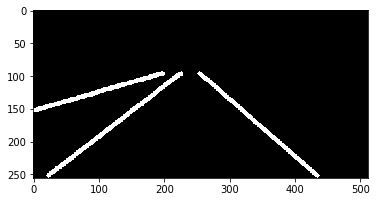

In [7]:
bin_img = np.zeros(shape=[img.shape[0], img.shape[1]], dtype=np.uint8)
nlanes = len(gt_lanes_vis)
for i, lane in enumerate(gt_lanes_vis):
    cv2.polylines(bin_img, np.int32([lane]), isClosed=False, color=1, thickness=thickness)
plt.imshow(bin_img, cmap=plt.cm.gray)
plt.show()    

# Generate lane instance image (different colors for different lanes)

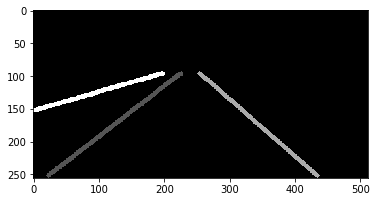

In [8]:
bin_img = np.zeros(shape=[img.shape[0], img.shape[1]], dtype=np.uint8)
nlanes = len(gt_lanes_vis)
color_codes = list(range(0, 255, 255//(nlanes + 1)))[1:]
for i, lane in enumerate(gt_lanes_vis):
    cv2.polylines(bin_img, np.int32([lane]), isClosed=False, color=color_codes[i], thickness=thickness)
plt.imshow(bin_img, cmap=plt.cm.gray)
plt.show()    